In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Resumo de resultados:

1. Muito bom
2. Muito ruim
3. Ruim
4. Muito ruim
5. Bom
6. Muito bom
7. Ruim
8. Muito ruim
9. Ruim
10. Bom
11. Bom


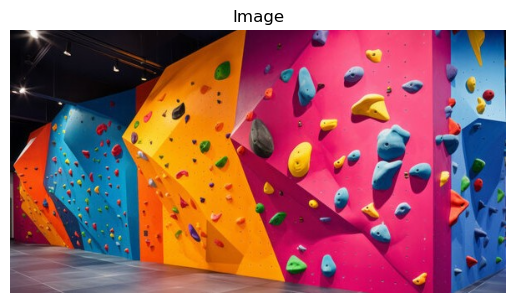

In [22]:
img = cv.imread("img/parede13.jpg", cv.IMREAD_UNCHANGED)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Image")
plt.axis("off")
plt.show()

In [ ]:
new_img = img_rgb.copy()
cyan = np.array([121, 196, 218])

# print(img_rgb[50, 50])

def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

In [ ]:
distance = np.linalg.norm(img_rgb - cyan, axis=2)

# Create a mask where distance < 50
mask = distance < 80

# Apply mask: keep pixels close to cyan, set others to black
new_img = np.zeros_like(img_rgb)
new_img[mask] = img_rgb[mask]

# Show the result
plt.imshow(new_img)
plt.title("Filtered Cyan Pixels")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))  # Width x Height in inches

# Original image
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title("Filtered (Cyan Pixels)")
plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()

In [ ]:
# shape = img.shape

# for i in range(shape[0]):
#     for j in range(shape[1]):
#         if distance(img_rgb[i, j], cyan) < 50:
#             new_img[i, j] = img_rgb[i, j]
#         else:
#             new_img[i, j] = (0, 0, 0)

In [ ]:
plt.imshow(new_img)
plt.title("Image")
plt.axis("off")
plt.show()

In [ ]:
img = cv.imread("img/parede.jpg", cv.IMREAD_UNCHANGED)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis("off")

for i in range(10):
    img_rgb = cv.medianBlur(img_rgb, 5)
    img_rgb = cv.GaussianBlur(img_rgb, (5, 5), 0)

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
distance = np.linalg.norm(img_rgb - cyan, axis=2)

# Create a mask where distance < 50
mask = distance < 80

# Apply mask: keep pixels close to cyan, set others to black
new_img = np.zeros_like(img_rgb)
new_img[mask] = img_rgb[mask]

# Show the result
plt.imshow(new_img)
plt.title("Filtered Cyan Pixels")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))  # Width x Height in inches

# Original image
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title("Filtered (Cyan Pixels)")
plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()

In [5]:
def buildDetector(minArea = 25):
    # Setup SimpleBlobDetector parameters.
    params = cv.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 0
    params.maxThreshold = 255


    # Filter by Area.
    params.filterByArea = True
    params.minArea = minArea

    # Filter by Circularity
    params.filterByCircularity = False
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.1
        
    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.05

    # Create a detector with the parameters
    ver = (cv.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv.SimpleBlobDetector(params)
    else : 
        detector = cv.SimpleBlobDetector_create(params)

    return detector

def findHolds(img,detector = None):
    # Applying a gaussian blur removes some small impurities that
    # could fool the detection algorithm. It also smooths out the
    # color of each hold to make it more uniform.
    img = cv.medianBlur(img, 3)

    # Using Otsu's method, the optimal threshold for the image can be found.
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    otsu, _ = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

    # Applys edge detection to find the borders between the hold and the wall
    # Otsu's threshold is intended to be used as the higher threshold with a
    # lower:upper ratio of 1:2. L2gradient is included for more precise results.
    edges = cv.Canny(img,otsu, otsu * 2, L2gradient = True)

    # Finds the contours of the image, without retaining the hierarchy
    contours, _ = cv.findContours(edges,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

    # Applies convex hulls to each contour, ensuring each contour
    # is a closed polygon.
    hulls = map(cv.convexHull,contours)

    mask = np.zeros(gray.shape, np.uint8)

    # Draws contours onto a blank canvas
    cv.drawContours(mask, contours, -1, 255, 2)

    # Show the mask using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Edges")
    plt.axis("off")
    plt.show()

    if detector == None:
        # Set up the detector with default parameters.
        detector = buildDetector()

    keypoints = detector.detect(mask)
    return keypoints, hulls

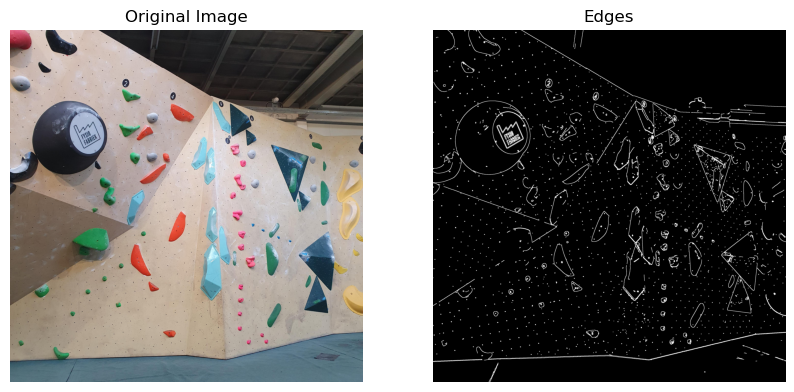

In [58]:
_ = findHolds(img_rgb)

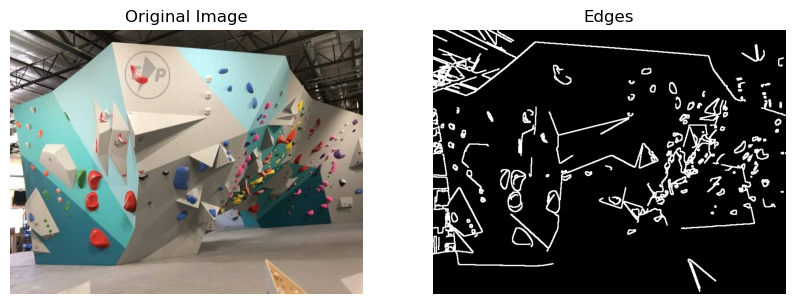

In [60]:
_ = findHolds(img_rgb)

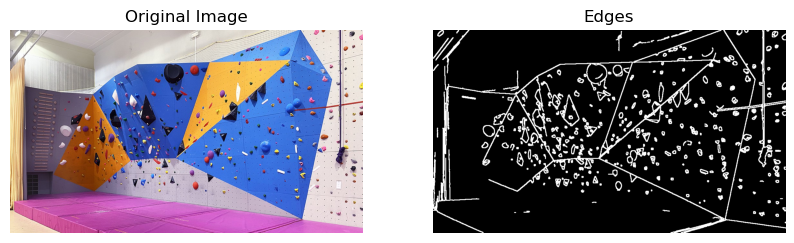

In [62]:
_ = findHolds(img_rgb)

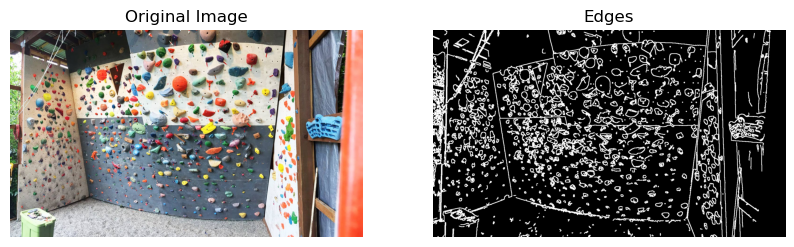

In [64]:
_ = findHolds(img_rgb)

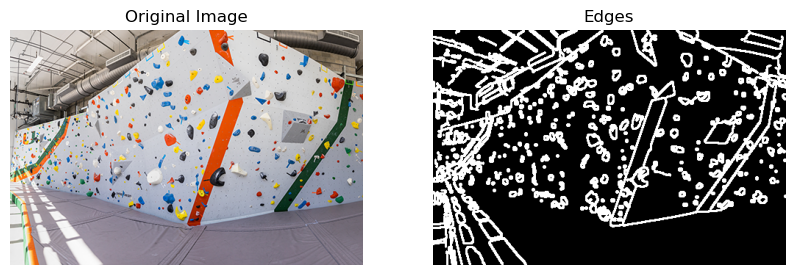

In [67]:
_ = findHolds(img_rgb)

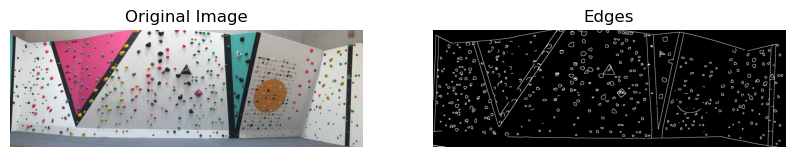

In [6]:
_ = findHolds(img_rgb)

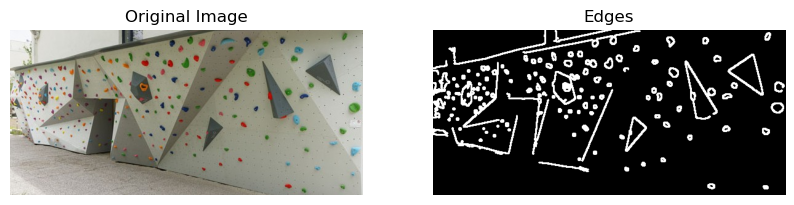

In [8]:
_ = findHolds(img_rgb)

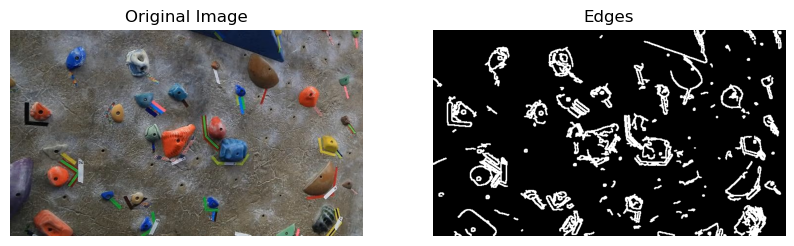

In [10]:
_ = findHolds(img_rgb)

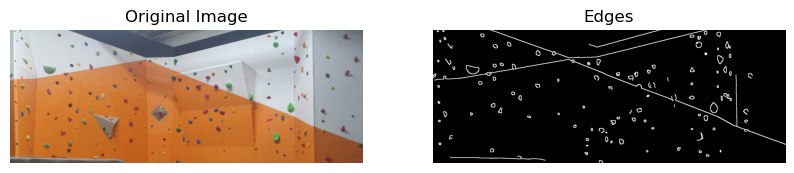

In [13]:
_ = findHolds(img_rgb)

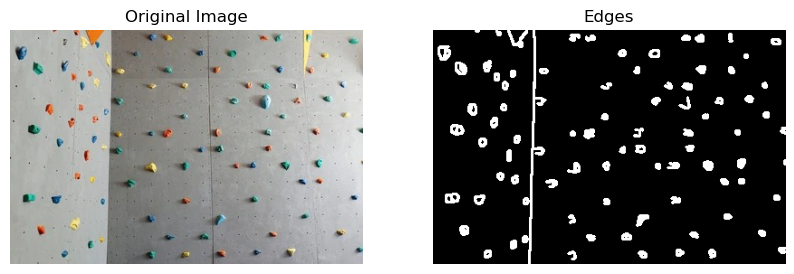

In [16]:
_ = findHolds(img_rgb)

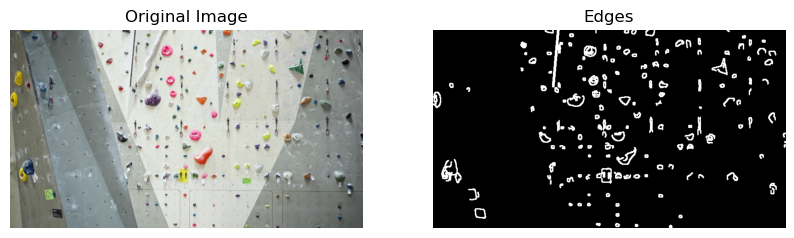

In [19]:
_ = findHolds(img_rgb)

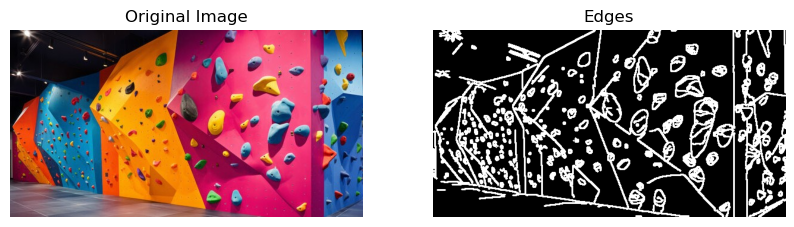

In [23]:
_ = findHolds(img_rgb)